In [5]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from src.inout import InOuter
from src.model import Model
from src.analysis import Analyzer
from src.processing import Processor
from src.utils.image_processing import calc_cdf
from skimage import exposure

inout = InOuter()
model = Model()
analyzer = Analyzer()
processor = Processor()
img_path = '../../data/'


# бездумная хрень
def split_and_equalize(img, num_blocks = 4):
    sliced = np.split(img,num_blocks,axis=0)
    blocks = [np.split(img_slice,num_blocks,axis=1) for img_slice in sliced]
    
    eqval_blocks = [[processor.eqval_hist_correction(block).astype(np.uint16) for block in block_list] for block_list in blocks]
        
    for i in range(num_blocks):
        for j in range(num_blocks - 1):
            eqval_blocks[i][j] = exposure.match_histograms(eqval_blocks[i][j], eqval_blocks[i][j+1])
     
    for i in range(num_blocks - 1):
        for j in range(num_blocks):
            eqval_blocks[i][j] = exposure.match_histograms(eqval_blocks[i][j], eqval_blocks[i + 1][j])


    img_stacked = np.block(eqval_blocks)
    return img_stacked.astype(np.uint16)



def auto_brightness_contrast(img):
    img = processor.eqval_hist_correction(img)
    return split_and_equalize(img, 2)
    

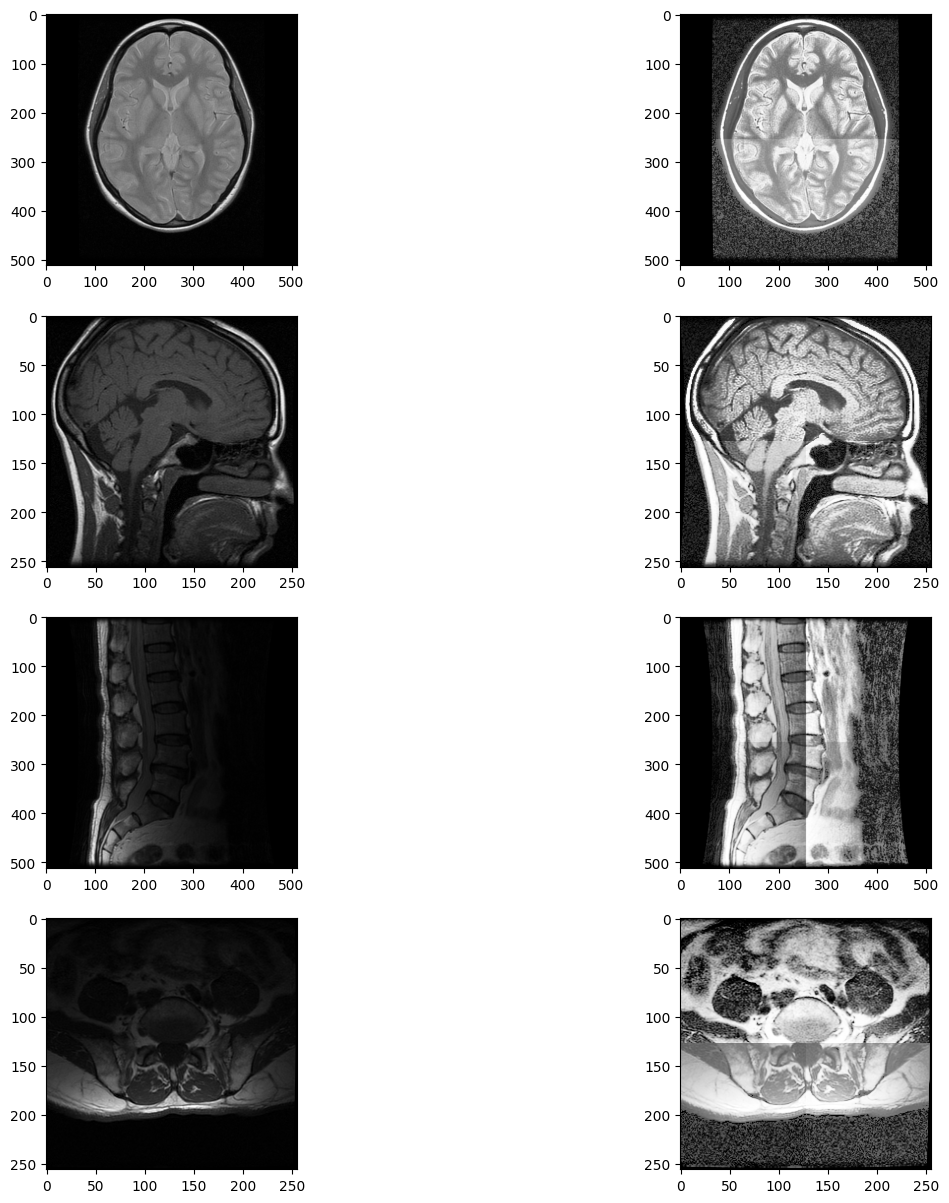

In [6]:
brain_v = np.flip(np.fromfile(img_path + 'brain-H_x512.bin', dtype=np.uint16).reshape(512, 512), axis=1)
brain_h = np.flip(np.fromfile(img_path + 'brain-V_x256.bin', dtype=np.uint16).reshape(256, 256), axis=1)
spine_h = np.flip(np.fromfile(img_path + 'spine-H_x256.bin', dtype=np.uint16).reshape(256, 256), axis=1)
spine_v = np.flip(np.fromfile(img_path + 'spine-V_x512.bin', dtype=np.uint16).reshape(512, 512), axis=1)
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

ax[0, 0].imshow(brain_v, 'gray')
ax[0, 1].imshow(auto_brightness_contrast(brain_v), 'gray')

ax[1, 0].imshow(brain_h, 'gray')
ax[1, 1].imshow(auto_brightness_contrast(brain_h), 'gray')

ax[2, 0].imshow(spine_v, 'gray')
ax[2, 1].imshow(auto_brightness_contrast(spine_v), 'gray')

ax[3, 0].imshow(spine_h, 'gray')
ax[3, 1].imshow(auto_brightness_contrast(spine_h), 'gray')